# Model Development and Evaluation Notebook

In this notebook, we focus on building, optimizing, and evaluating the predictive model. Key steps include:

1. **Data Preparation**:
   - Split the data into training and test sets.
   - Scale the features to ensure compatibility with machine learning algorithms.

2. **Model Training**:
   - Train various regression models to predict the target variable.
   - Use cross-validation to evaluate performance and avoid overfitting.

3. **Hyperparameter Optimization**:
   - Apply `GridSearchCV` to identify the best combination of hyperparameters for the selected model.

4. **Model Evaluation**:
   - Assess the model's performance on the test set using metrics such as R², RMSE, MSE, and MAE.
   - Compare training and test performance to check for overfitting or underfitting.

5. **Final Model**:
   - Train the final model with the best hyperparameters.
   - Save the trained model for future use.

This notebook concludes the project by delivering a well-optimized and validated predictive model.


### 1.1 Importing libraries

In [42]:
import pandas as pd
import numpy as np 
import pickle
import matplotlib.pyplot as plt

#Machine Learning libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, HuberRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.utils import all_estimators

## 1. Train-Test Split and Model Preparation

### 1.1 Load Data

In [15]:
normal_data = pd.read_csv("cleaned_data_houses.csv")
normal_data_no_outliers = pd.read_csv("cleaned_data_noOutliers.csv")

feature_data = pd.read_csv("feature_data_house.csv") # Data without some irrelevant columns
feature_data_no_outliers = pd.read_csv("feature_data_noOutliers.csv")

#### 1.1 Split Data and Scale Data

In [17]:
def split_scale_data(df):
    # Define the features (X) and target (y)
    X = df.drop(columns=['price'])  # Drop the target variable
    y = df['price']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features using StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

#### 1.2 Fit model and Testing

In [19]:
import time  # Para medir el tiempo
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def fit_test_models(X_train_scaled, X_test_scaled, y_train, y_test):
    # List of regression models to test
    models = {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(alpha=1.0),
        "Lasso Regression": Lasso(alpha=1, max_iter=10000),
        "ElasticNet": ElasticNet(alpha=0.5, l1_ratio=0.5),
        "Bayesian Ridge": BayesianRidge(),
        "Huber Regressor": HuberRegressor(),
        "KNeighbors Regressor": KNeighborsRegressor(n_neighbors=5),
        "Decision Tree": DecisionTreeRegressor(random_state=42),
        "Random Forest": RandomForestRegressor(random_state=42),
        "Extra Trees Regressor": ExtraTreesRegressor(random_state=42),
        "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
        "XGBoost Regressor": XGBRegressor(random_state=42, verbosity=0),
        "LightGBM Regressor": LGBMRegressor(force_row_wise=True, random_state=42),
        "SVR": SVR(kernel='linear', C=1.0, epsilon=1.5, gamma=0.5)
    }
    
    # DataFrame to store results
    results = []
    
    # Train and evaluate each model
    for name, model in models.items():
        start_time = time.time()  # Registrar el tiempo de inicio
        
        # Train the model
        model.fit(X_train_scaled, y_train)
        
        # Predict on the test set
        y_pred = model.predict(X_test_scaled)
        
        end_time = time.time()  # Registrar el tiempo de finalización
        
        # Calculate evaluation metrics
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        elapsed_time = end_time - start_time  # Tiempo total en segundos
        
        # Store results
        results.append({"Model": name, "R²": r2, "MSE": mse, "RMSE": rmse, "MAE": mae, "Time (s)": elapsed_time})
    
    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)
    
    # Sort the results by R² and reset the index
    results_df = results_df.sort_values(by="R²", ascending=False).reset_index(drop=True)
    
    return results_df

#### 1.3 Try original data with and without outliers

In [21]:
# Normal data with outliers
X_train_scaled, X_test_scaled, y_train, y_test = split_scale_data(normal_data) 
results_df = fit_test_models(X_train_scaled, X_test_scaled, y_train, y_test)

results_df

C:\Users\Bootcamp\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.048e+13, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(


[LightGBM] [Info] Total Bins 2610
[LightGBM] [Info] Number of data points in the train set: 17290, number of used features: 21
[LightGBM] [Info] Start training from score 537768.047947


,Model,R²,MSE,RMSE,MAE,Time (s)
0,LightGBM Regressor,0.879234,1.825699e+10,135118.446099,70187.597190,0.130118
1,XGBoost Regressor,0.866399,2.019729e+10,142117.154317,70059.104382,0.122111
2,Extra Trees Regressor,0.853182,2.219547e+10,148981.457367,72559.454386,7.304042
3,Random Forest,0.852907,2.223701e+10,149120.792695,72919.246452,15.564188
4,Gradient Boosting Regressor,0.851740,2.241339e+10,149711.029760,81333.972337,4.034676
5,KNeighbors Regressor,0.769507,3.484517e+10,186668.614156,98724.700486,0.282256
6,Linear Regression,0.702770,4.493431e+10,211977.153747,126544.310437,0.032028
7,Lasso Regression,0.702668,4.494963e+10,212013.280497,126950.385795,1.708697
8,Ridge Regression,0.702667,4.494987e+10,212013.843818,126948.410696,0.008007
9,Bayesian Ridge,0.702638,4.495427e+10,212024.229662,126916.081878,0.011010


In [22]:
# Normal data without outliers
X_train_scaled, X_test_scaled, y_train, y_test = split_scale_data(normal_data_no_outliers)
results_df = fit_test_models(X_train_scaled, X_test_scaled, y_train, y_test)

# Save best model to compare later
best_model_df = results_df.iloc[[0]]

results_df

C:\Users\Bootcamp\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.596e+12, tolerance: 3.382e+10
  model = cd_fast.enet_coordinate_descent(


[LightGBM] [Info] Total Bins 2400
[LightGBM] [Info] Number of data points in the train set: 11094, number of used features: 18
[LightGBM] [Info] Start training from score 428874.198576


,Model,R²,MSE,RMSE,MAE,Time (s)
0,LightGBM Regressor,0.884641,3.523345e+09,59357.770187,41770.021819,0.090082
1,XGBoost Regressor,0.877894,3.729398e+09,61068.800650,42502.417707,0.097087
2,Extra Trees Regressor,0.871840,3.914295e+09,62564.324286,43270.231925,4.190880
3,Random Forest,0.867344,4.051611e+09,63652.262473,44377.072224,8.513262
4,Gradient Boosting Regressor,0.848639,4.622904e+09,67991.939268,48294.887979,2.472731
5,Decision Tree,0.720077,8.549490e+09,92463.452240,64235.939077,0.159144
6,KNeighbors Regressor,0.716629,8.654819e+09,93031.281175,64519.244629,0.064058
7,Lasso Regression,0.660546,1.036770e+10,101821.906253,76336.095784,1.109616
8,Ridge Regression,0.660545,1.036774e+10,101822.089041,76335.816843,0.003003
9,Bayesian Ridge,0.660526,1.036832e+10,101824.936557,76334.177522,0.005004


#### Now we'll compare the metrics with feature engineering data to see if there is a performance

#### 1.4 Try feature data with and without outliers

In [25]:
# Feature data with outliers
X_train_scaled, X_test_scaled, y_train, y_test = split_scale_data(feature_data)
results_df = fit_test_models(X_train_scaled, X_test_scaled, y_train, y_test)

results_df

C:\Users\Bootcamp\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.060e+13, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(


[LightGBM] [Info] Total Bins 2339
[LightGBM] [Info] Number of data points in the train set: 17290, number of used features: 18
[LightGBM] [Info] Start training from score 537768.047947


,Model,R²,MSE,RMSE,MAE,Time (s)
0,LightGBM Regressor,0.881342,1.793832e+10,133934.004104,70237.484047,0.095398
1,XGBoost Regressor,0.855126,2.190161e+10,147991.934471,71751.380160,0.104095
2,Random Forest,0.853767,2.210703e+10,148684.321411,72784.741791,13.258928
3,Gradient Boosting Regressor,0.852108,2.235780e+10,149525.243715,81312.170244,3.418332
4,Extra Trees Regressor,0.845529,2.335236e+10,152814.805078,73118.123276,5.944374
5,KNeighbors Regressor,0.779853,3.328105e+10,182430.952780,93150.984039,0.101092
6,Decision Tree,0.716936,4.279265e+10,206863.843898,103437.609877,0.233212
7,Linear Regression,0.701190,4.517305e+10,212539.516638,127493.342087,0.003003
8,Lasso Regression,0.701190,4.517309e+10,212539.608147,127493.333960,1.477221
9,Ridge Regression,0.701189,4.517331e+10,212540.126167,127491.400480,0.002002


In [26]:
# Feature data with outliers
X_train_scaled, X_test_scaled, y_train, y_test = split_scale_data(feature_data_no_outliers)
results_df = fit_test_models(X_train_scaled, X_test_scaled, y_train, y_test)

results_df

C:\Users\Bootcamp\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.651e+12, tolerance: 3.382e+10
  model = cd_fast.enet_coordinate_descent(


[LightGBM] [Info] Total Bins 2129
[LightGBM] [Info] Number of data points in the train set: 11094, number of used features: 15
[LightGBM] [Info] Start training from score 428874.198576


,Model,R²,MSE,RMSE,MAE,Time (s)
0,LightGBM Regressor,0.880940,3.636376e+09,60302.368585,42477.151862,0.083407
1,XGBoost Regressor,0.870952,3.941428e+09,62780.791912,43688.592838,0.088080
2,Extra Trees Regressor,0.865525,4.107190e+09,64087.362385,44433.702884,3.524698
3,Random Forest,0.863700,4.162905e+09,64520.575784,45068.785842,7.296052
4,Gradient Boosting Regressor,0.843565,4.777884e+09,69122.240456,49267.708938,2.062475
5,KNeighbors Regressor,0.759299,7.351564e+09,85741.260826,59628.342970,0.064059
6,Decision Tree,0.728191,8.301672e+09,91113.511352,63934.050649,0.135431
7,Lasso Regression,0.659014,1.041450e+10,102051.434182,76487.552952,0.998220
8,Ridge Regression,0.659012,1.041455e+10,102051.716878,76487.385225,0.001001
9,Bayesian Ridge,0.658993,1.041514e+10,102054.570640,76485.317468,0.004004


#### We see that the data that give us the best results are the normal data without outliers. And the best fitting model is the LightGBM Regressor, so before we continue we will check if it has overfitting.

In [28]:
X_train_scaled, X_test_scaled, y_train, y_test = split_scale_data(normal_data_no_outliers)

# Inicializar el modelo
lightgbm = LGBMRegressor(force_row_wise=True, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
lightgbm.fit(X_train_scaled, y_train)

# Predicción en el conjunto de entrenamiento
y_train_pred = lightgbm.predict(X_train_scaled)

# Predicción en el conjunto de prueba
y_test_pred = lightgbm.predict(X_test_scaled)

# Evaluación en el conjunto de entrenamiento
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

# Evaluación en el conjunto de prueba
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

# Mostrar resultados
print("\nPerformance on Training Set:")
print(f"R²: {r2_train:.4f}, RMSE: {rmse_train:.2f}")

print("\nPerformance on Test Set:")
print(f"R²: {r2_test:.4f}, RMSE: {rmse_test:.2f}")

[LightGBM] [Info] Total Bins 2400
[LightGBM] [Info] Number of data points in the train set: 11094, number of used features: 18
[LightGBM] [Info] Start training from score 428874.198576

Performance on Training Set:
R²: 0.9222, RMSE: 48709.61

Performance on Test Set:
R²: 0.8846, RMSE: 59357.77


#### The difference between the two is small (~3.8%), indicating that the model generalises well. To ensure our model generalizes well and avoids overfitting, we will perform hyperparameter tuning using cross-validation. We will use GridSearchCV to test multiple hyperparameter combinations and identify the optimal settings.

In [30]:
X_train_scaled, X_test_scaled, y_train, y_test = split_scale_data(normal_data_no_outliers)

# Definir modelo y GridSearchCV
param_grid = {
    'learning_rate': [0.005, 0.1],
    'n_estimators': [4000, 4500],
    'max_depth': [6]
}

lightgbm = GridSearchCV(
    LGBMRegressor(force_row_wise=True, random_state=42, verbose=-1),
    param_grid,
    scoring='r2',
    cv=5
)

# Medir el tiempo de entrenamiento y predicción
start_time = time.time()

# Entrenar modelo
lightgbm.fit(X_train_scaled, y_train)

# Tiempo total
elapsed_time = time.time() - start_time

# Predicciones y evaluación
predictions = lightgbm.predict(X_test_scaled)

# Calcular métricas
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Imprimir resultados
print("\n\nActual Model Performance:")
print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"Time Taken: {elapsed_time:.2f} seconds")
print("Best Parameters:", lightgbm.best_params_)



Actual Model Performance:
R²: 0.8919
MSE: 3302011190.78
RMSE: 57463.13
MAE: 40141.38
Time Taken: 44.78 seconds
Best Parameters: {'learning_rate': 0.005, 'max_depth': 6, 'n_estimators': 4500}


In [31]:
# Imprimir resultados del modelo antes de hiperparametrizar
best_model_df

,Model,R²,MSE,RMSE,MAE,Time (s)
0,LightGBM Regressor,0.884641,3.523345e+09,59357.770187,41770.021819,0.090082


#### Test if model with best params have overfitting and get most important features

In [36]:
# Predicción en el conjunto de entrenamiento
train_predictions = lightgbm.best_estimator_.predict(X_train_scaled)

# Métricas en el conjunto de entrenamiento
train_r2 = r2_score(y_train, train_predictions)
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))

# Obtener las importancias de las características del mejor modelo
importances = lightgbm.best_estimator_.feature_importances_

# Guardar los nombres originales de las columnas (antes de escalar)
feature_names = normal_data_no_outliers.drop("price", axis=1).columns  # Ajusta según tu conjunto de datos

# Crear un DataFrame para ordenar y mostrar las características más importantes
importances_df = pd.DataFrame({
    'Feature': feature_names,  # Usar los nombres originales
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Métricas en el conjunto de prueba (ya calculadas)
print("\nTraining Performance:")
print(f"R² (Train): {train_r2:.4f}")
print(f"RMSE (Train): {train_rmse:.2f}")

print("\nTest Performance:")
print(f"R² (Test): {r2:.4f}")
print(f"RMSE (Test): {rmse:.2f}")



Training Performance:
R² (Train): 0.9379
RMSE (Train): 43500.44

Test Performance:
R² (Test): 0.8919
RMSE (Test): 57463.13


#### The results indicate that the model is performing well and does not show significant overfitting.

### 1.5 Most importante features

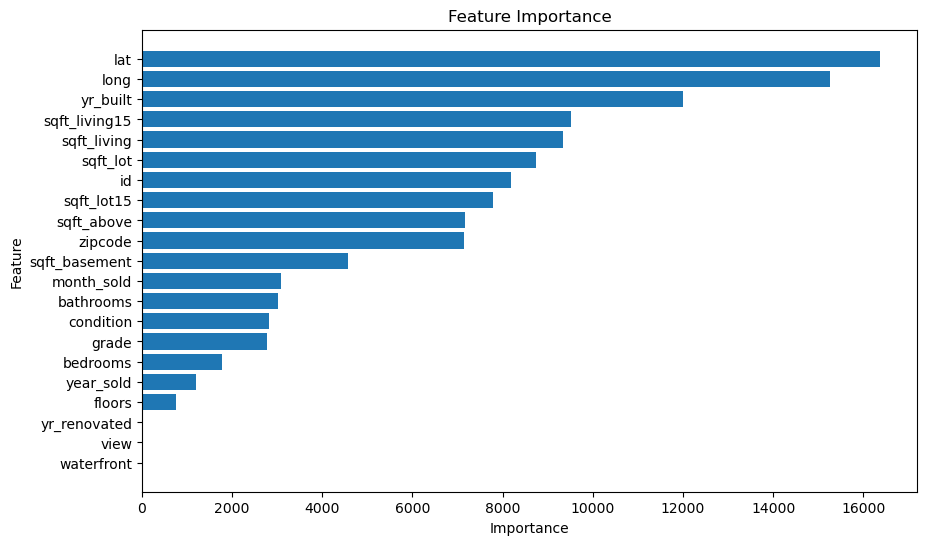

In [44]:
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invertir para que la más importante esté arriba
plt.show()

### 1.6 Save model

In [47]:
# Guardar el mejor modelo del GridSearch
with open("final_lightgbm_model.pkl", "wb") as file:
    pickle.dump(lightgbm.best_estimator_, file)
    print("Model saved successfully")

Model saved successfully
